In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import fstd2nc
import cftime

In [2]:
from dask_jobqueue import PBSCluster

# Import a client
from dask.distributed import Client

# Setup your PBSCluster
cluster = PBSCluster(
    cores=8, # The number of cores you want
    memory='128 GB', # Amount of memory
    processes=40, # How many processes
    queue='development', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=40:mem=128GB', # Specify resources
    walltime='06:00:00', # Amount of wall time
    interface='ib0', # Interface to use
    scheduler_options={"dashboard_address": ":8790"}
)
# Scale up
cluster.scale(1)

# Change your url to the dask dashboard so you can see it
#dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)
client

<Client: 'tcp://10.102.15.227:12195' processes=0 threads=0, memory=0 B>

In [3]:
#ds_cpl_his1 = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/users/ncs001/canesm_runs/v6a3-3-cplhis-01/data/mc_v6a3-3-cplhis-01_1952_m01_cplhist.nc.001',
#                              chunks={'time':250})  # CanESM6-a3.3 INCLUDES heat content correct which will break remapping conservation

ds_cpl_his1 = xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/ncs001/canesm_runs/v6a3-3-cplhis-02/data/mc_v6a3-3-cplhis-02_1950_m01_cplhist.nc.001',
                              chunks={'time':250})  # CanESM6-a3.3 TURNING OFF heat content correction. Expect as good a conservation as before.



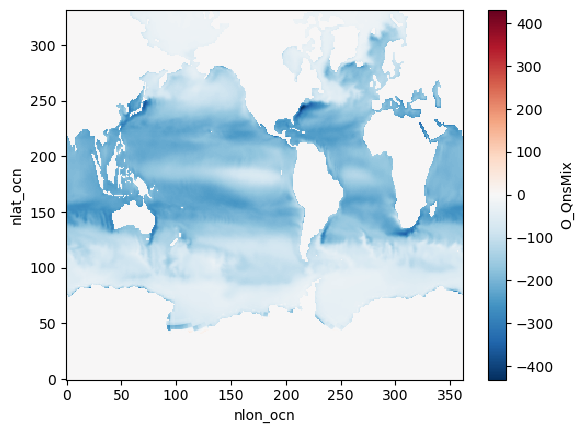

In [4]:
ds_cpl_his1.O_QnsMix.mean(dim='time').plot()

In [5]:
mask = xr.where(ds_cpl_his1.O_QnsMix.isel(time=1)==0, 1, np.nan)
ds_cpl_his1['O_QnsMix_mask'] = mask


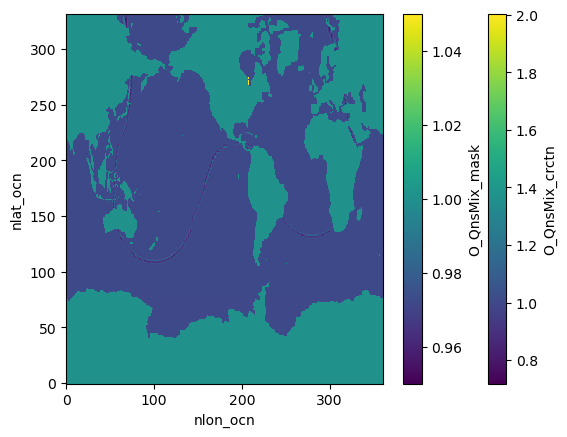

In [6]:
ds_cpl_his1.O_QnsMix_crctn.plot()
ds_cpl_his1['O_QnsMix_mask'].plot()

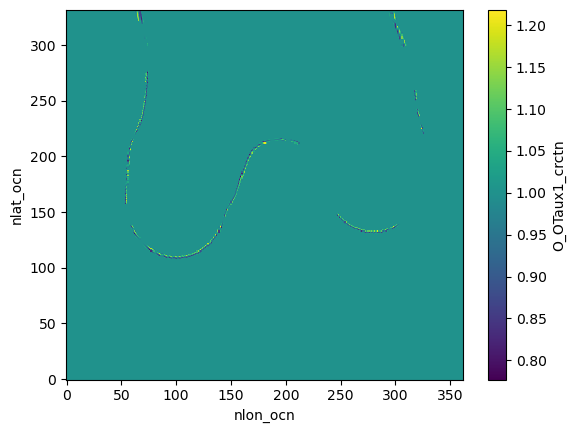

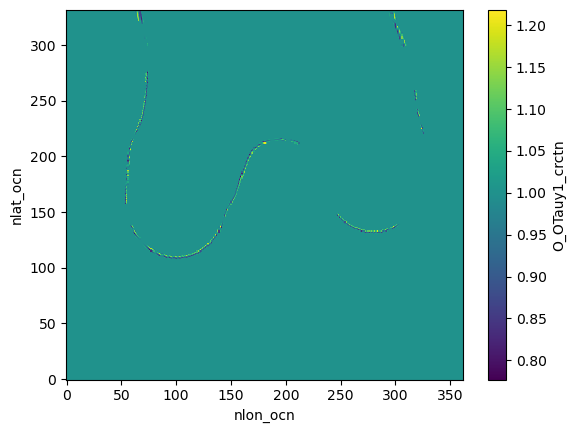

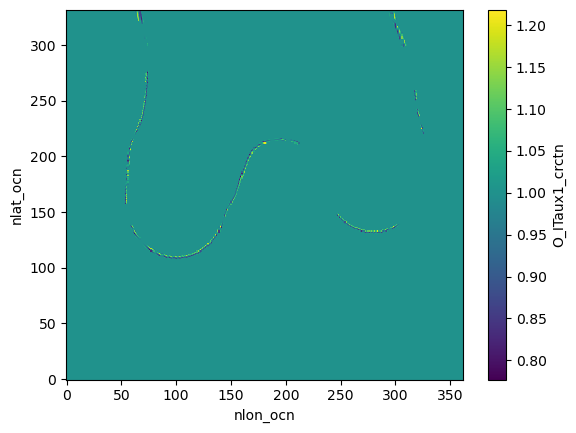

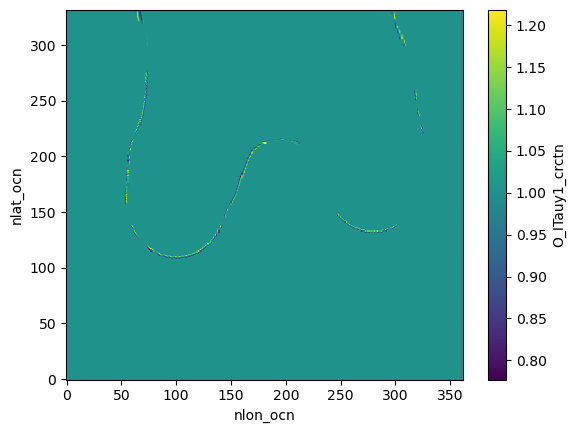

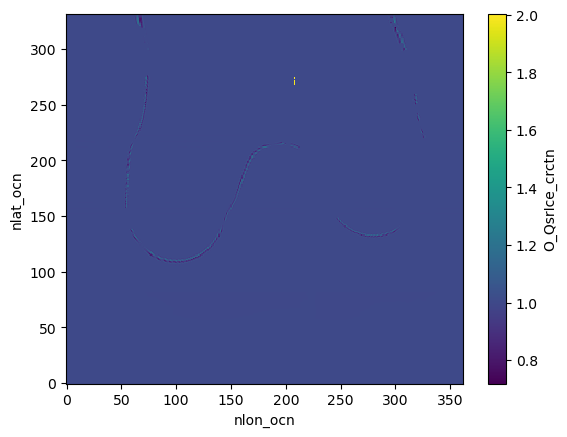

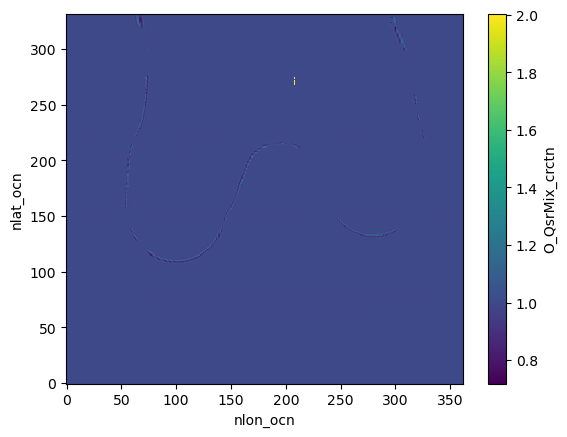

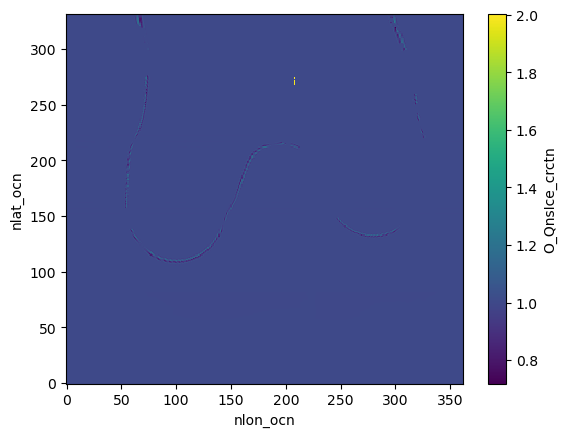

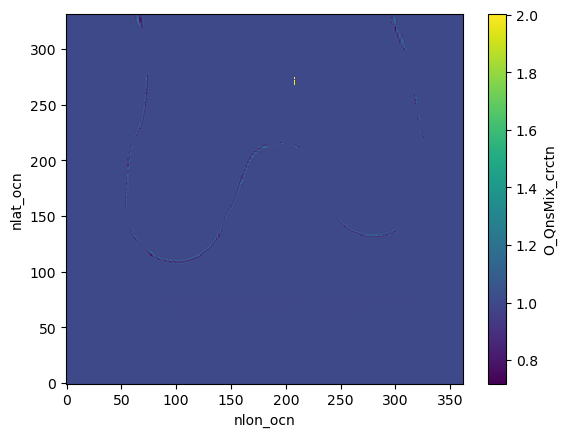

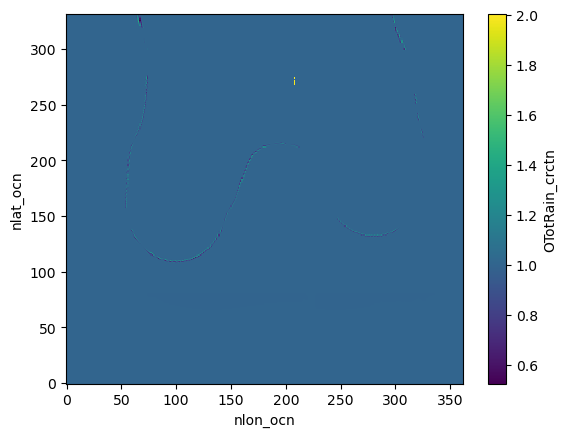

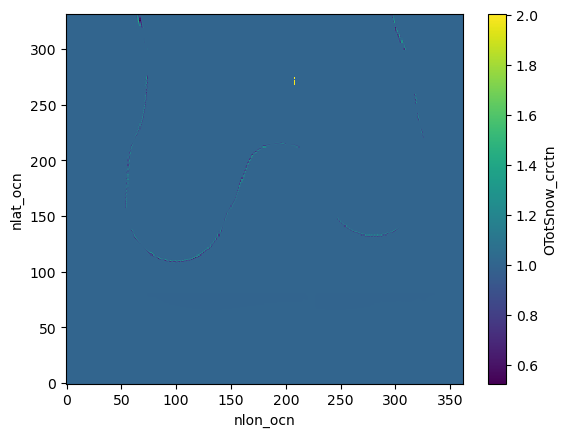

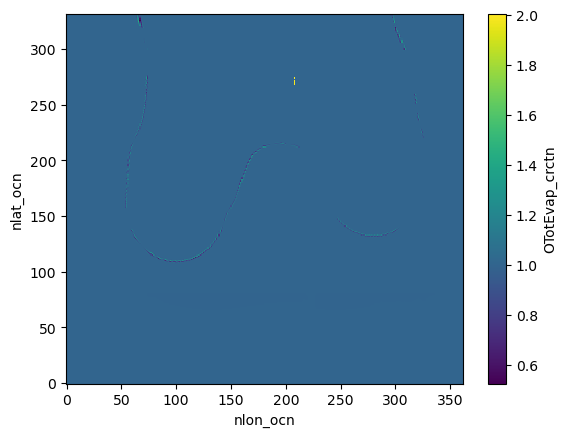

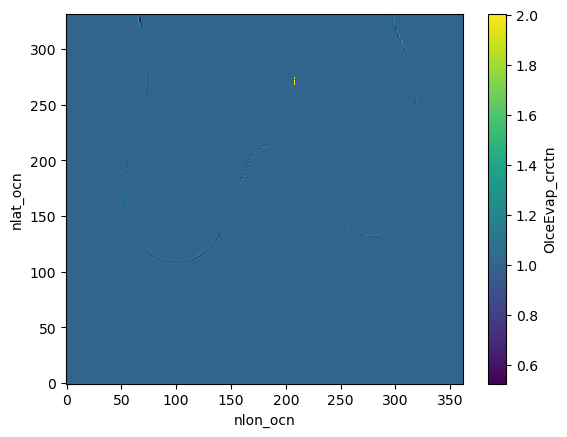

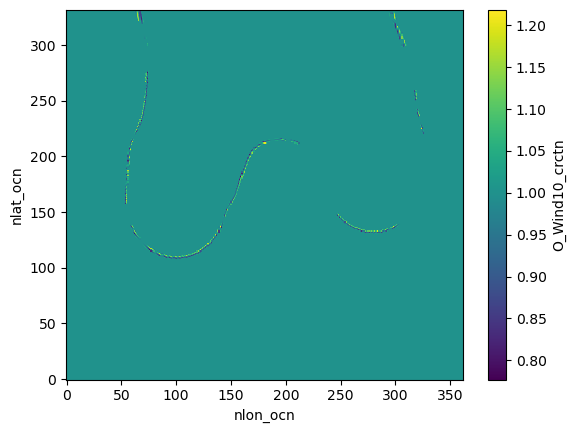

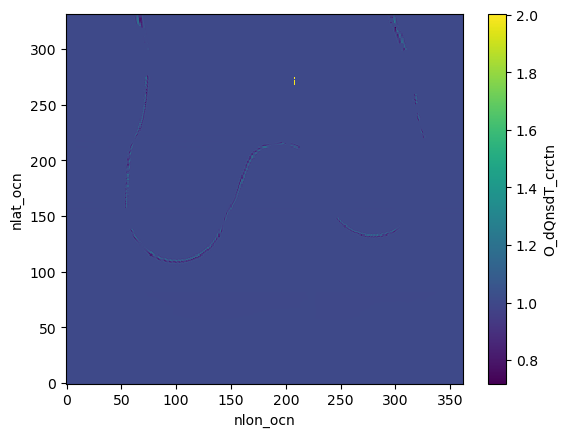

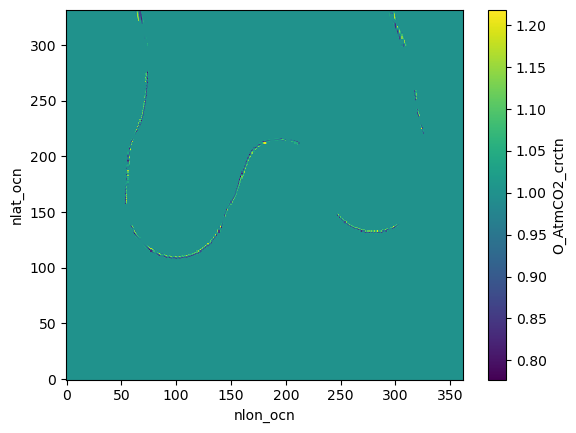

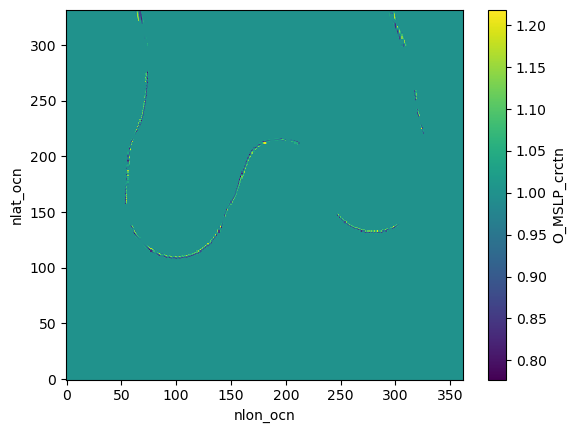

In [7]:
variables_with_crctn = [var for var in ds_cpl_his1.variables if var.endswith('_crctn')]

# Print the result
for var in variables_with_crctn:
    plt.figure()
    ds_cpl_his1[var].plot()